### Installing Dependencies

In [14]:
# ! pip install scikit-learn
# ! pip install seaborn
# ! pip install matplotlib

### Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import os, time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings('ignore')

### Data Exploration

##### Loading the dataset

In [16]:
dataset_name = "Mall_Customers.csv"
path = os.path.join(os.getcwd(), dataset_name)
df = pd.read_csv(path)

In [17]:
df_columns = df.columns
print("Size of dataset: ", df.shape)
df.head()

Size of dataset:  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
print(df.isnull().sum())

r"""The dataset does not have any null values"""

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


'The dataset does not have any null values'

In [19]:
# checking feature datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
# renaming columns for simplicity
mapping = {'Spending Score (1-100)': "SpendingScore",
           'Annual Income (k$)': 'AnnualDollarIncome',
           }
df.rename(columns=mapping,inplace=True)
df.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualDollarIncome', 'SpendingScore'], dtype='object')

In [22]:
# finding unique values in each column

df.nunique()

CustomerID            200
Gender                  2
Age                    51
AnnualDollarIncome     64
SpendingScore          84
dtype: int64

In [23]:
"""removing customer ID column as it's a UID only"""

df_main = df.drop(columns="CustomerID", inplace=False, errors='ignore')
df_main.head()

,Gender,Age,AnnualDollarIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


'No strong correlations between features found so all good for now'

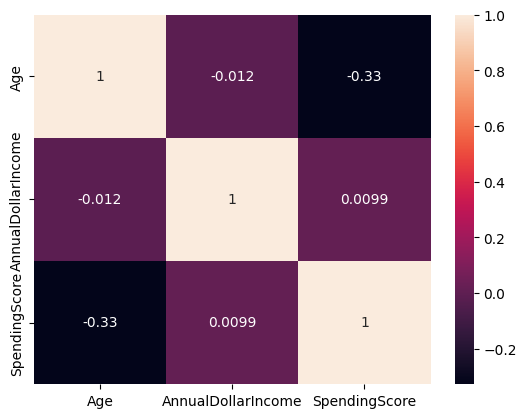

In [24]:
# visualing each feature's distribution - heatmap and pairplot

correlations = df_main.corr(method="pearson", numeric_only=True)
sb.heatmap(correlations, annot=True)

r"""No strong correlations between features found so all good for now"""

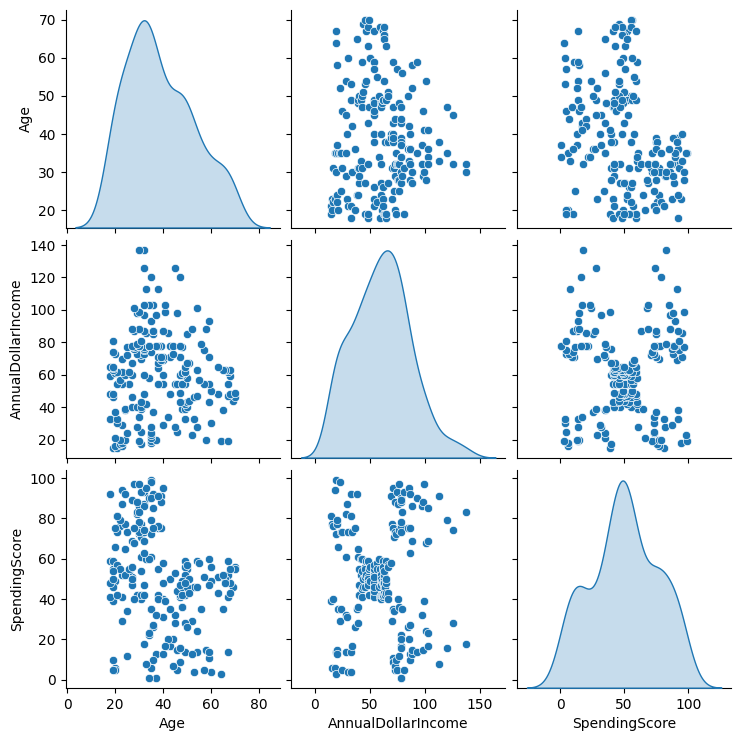

In [25]:
# exploring distributions to get a better insight - pairplot of num columns

sb.pairplot(df_main, diag_kind="kde");

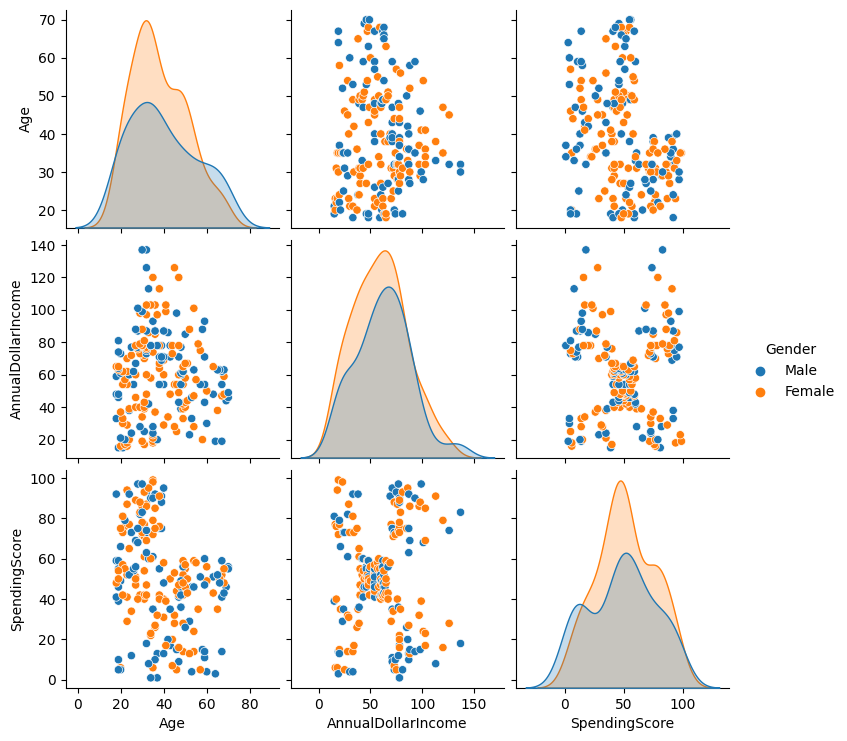

In [26]:
#with hue - Gender
sb.pairplot(df_main, diag_kind="kde", hue='Gender');

### Univariate Analysis - for each column

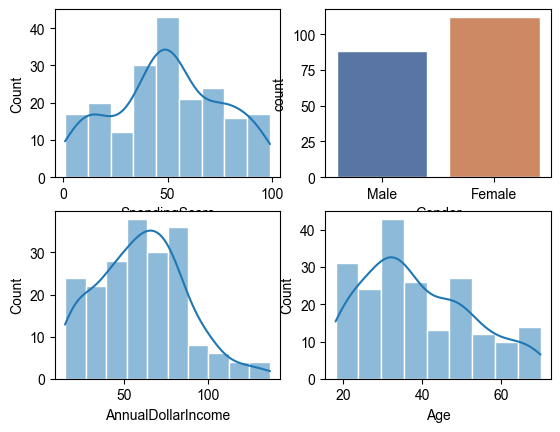

In [27]:
fig, axes = plt.subplots(2,2)
sb.set(rc={"figure.figsize":(16, 12)}) #width=6, height=5
sb.histplot(data = df_main, x = 'SpendingScore', kde=True, ax=axes[0,0]);
sb.countplot(data = df, x = "Gender", ax=axes[0,1]);
sb.histplot(data = df_main, x = 'AnnualDollarIncome', kde=True, ax=axes[1,0]);
sb.histplot(data = df_main, x = 'Age', kde=True, ax=axes[1,1]);

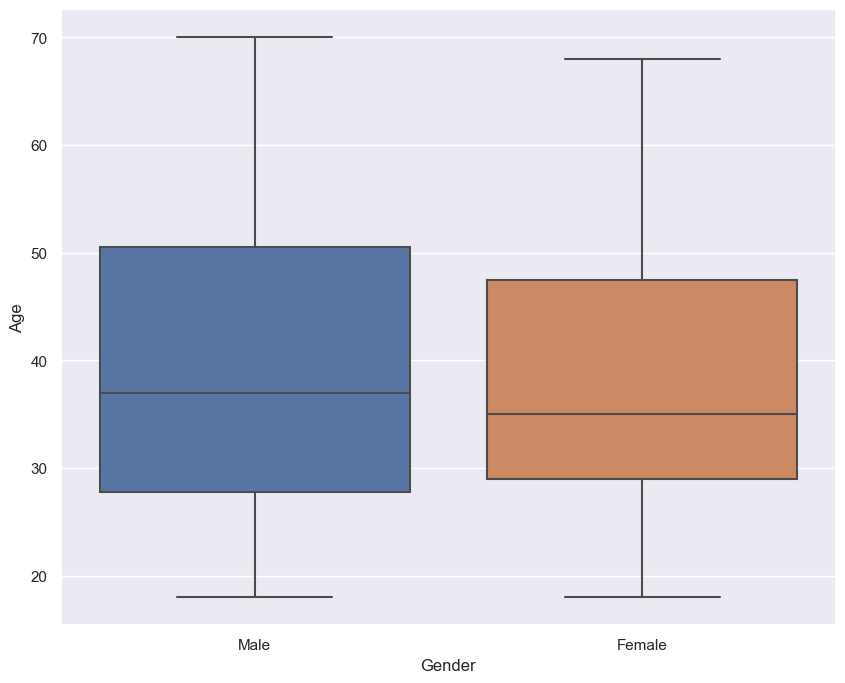

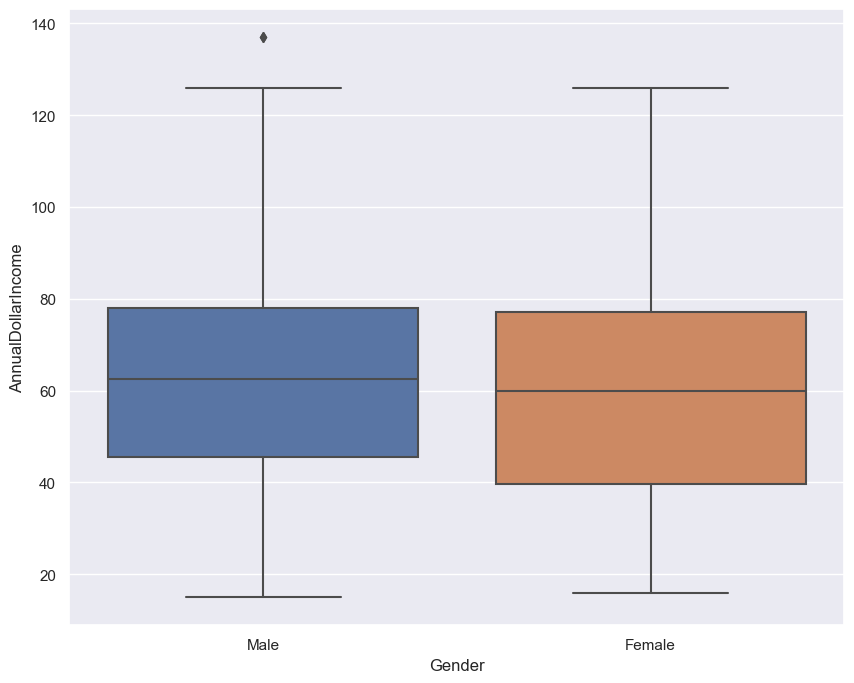

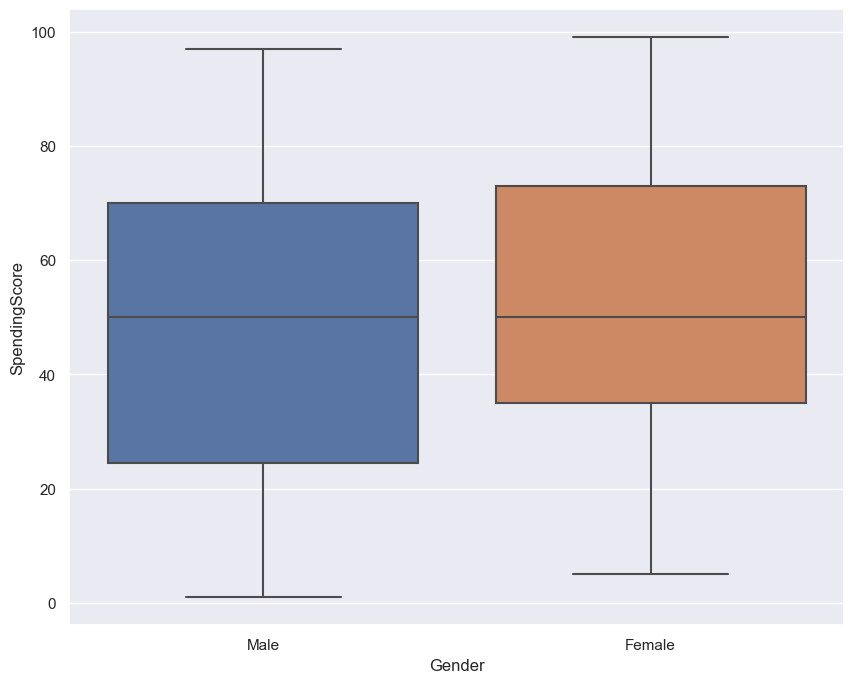

In [28]:
# Boxplots
num_cols = ['Age', 'AnnualDollarIncome', 'SpendingScore']
sb.set(rc={"figure.figsize":(10, 8)}) #width=6, height=5
for i in num_cols:
    plt.figure()
    sb.boxplot(data=df_main, x = 'Gender', y = df_main[i])

In [29]:
df_main.groupby(by=['Gender'])[['Age', 'AnnualDollarIncome', 'SpendingScore']].mean()

,Age,AnnualDollarIncome,SpendingScore
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


### Clustering - Segmenting

In [30]:
# Encoding Gender column for ease of computing to 0 and 1
mappingfn = {"Female": 0,
           "Male": 1}
df_main.Gender = df_main.Gender.map(mappingfn)

#### Univariate Clustering

In [41]:
# simply looping over all columns for univariate clustering and also for cluster ranges (1, 10)
clusters = list(range(1, 11, 1))
univar_cols = ['Gender', 'Age', 'AnnualDollarIncome', 'SpendingScore']
inertia = {}
for i in clusters:
    temp = pd.DataFrame(columns=['Column Cluster', 'Inertia'])
    for j in univar_cols:
        clustering = KMeans(n_clusters=i)
        clustering.fit(X=df_main[[j]])
        temp.loc[len(temp.index)] = [j, clustering.inertia_]
        # temp = temp.append({'Column Cluster' : j, 'Inertia': clustering.inertia_}, ignore_index = True)
    inertia[i] = temp# only storing metrics of the k-means clustering

In [65]:
inertia[10]

,Column Cluster,Inertia
0,Gender,2.598311e-29
1,Age,3.871182e+02
2,AnnualDollarIncome,1.891624e+03
3,SpendingScore,1.321133e+03


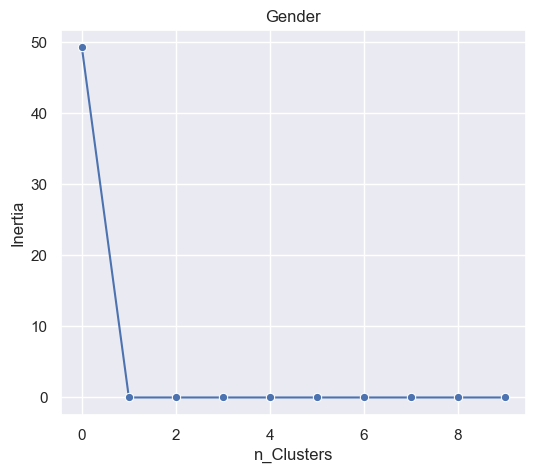

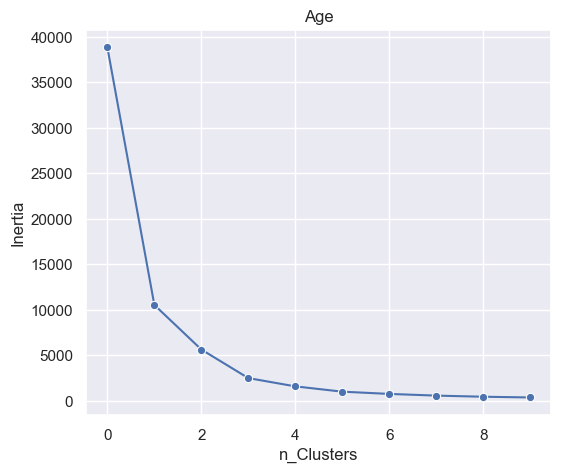

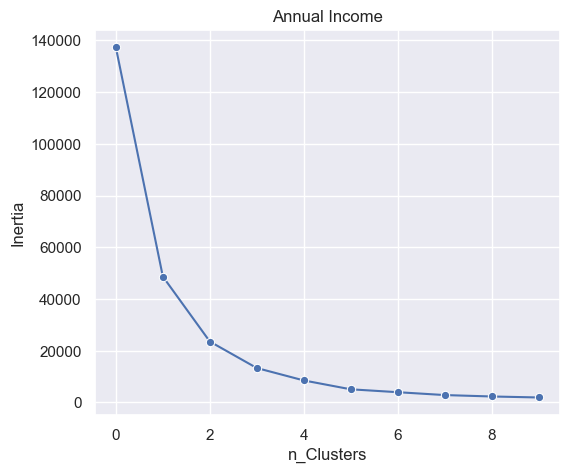

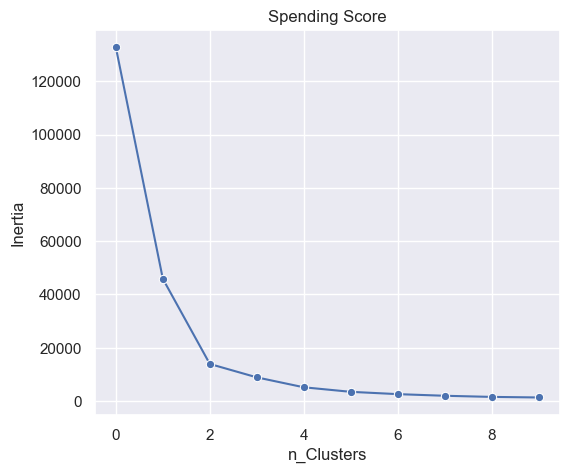

In [71]:
# univariate elbow plots
# gender = [j for i in range(1,11,1) for j in inertia[i].iloc[0,1]]

gender = []
age = []
AnnualIncome = []
SpendingScore = []
for i in range(1,11,1):
    gender.append(inertia[i].iloc[0,1])
    age.append(inertia[i].iloc[1,1])
    AnnualIncome.append(inertia[i].iloc[2,1])
    SpendingScore.append(inertia[i].iloc[3,1])

sb.set(rc={"figure.figsize":(6, 5)}) #width=6, height=5
unicols = [gender, age, AnnualIncome, SpendingScore]
plot_names = ["Gender", "Age", "Annual Income", "Spending Score"]
for i,j in enumerate(unicols):
    plt.figure()
    sb.lineplot(data=j, marker='o')
    plt.xlabel('n_Clusters')
    plt.ylabel('Inertia')
    plt.title(plot_names[i])

###### Observations:

- The clustering based on Gender doesn't make sense - so we keep it aside.
- Based on the the other factors 5 clusters seems like a good bet.

#### Bivariate Clustering